In [1]:
from astropy.table import Table

# Read in results that we saved last time

In [2]:
filename = 'gd1_results.fits'
results = Table.read(filename)

In [4]:
results.info

<Table length=140340>
      name       dtype    unit                              description                            
--------------- ------- -------- ------------------------------------------------------------------
      source_id   int64          Unique source identifier (unique within a particular Data Release)
             ra float64      deg                                                    Right ascension
            dec float64      deg                                                        Declination
           pmra float64 mas / yr                         Proper motion in right ascension direction
          pmdec float64 mas / yr                             Proper motion in declination direction
       parallax float64      mas                                                           Parallax
 parallax_error float64      mas                                         Standard error of parallax
radial_velocity float64   km / s                                              

# Selecting row and columns

### Investigating column names

In [6]:
results.colnames

['source_id',
 'ra',
 'dec',
 'pmra',
 'pmdec',
 'parallax',
 'parallax_error',
 'radial_velocity']

### Selecting a column

In [7]:
results['ra']

142.48301935991023
142.25452941346344
142.64528557468074
142.57739430926034
142.58913564478618
141.81762228999614
143.18339801317677
142.9347319464589
142.26769745823267
142.89551292869012
142.2780935768316


In [8]:
type(results['ra'])

astropy.table.column.Column

has data, name, and units

### rows

numbered 0 through n-1

In [9]:
results[0]

source_id,ra,dec,pmra,pmdec,parallax,parallax_error,radial_velocity
,deg,deg,mas / yr,mas / yr,mas,mas,km / s
int64,float64,float64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354,0.823720794509811,1e+20


In [10]:
type(results[0])

astropy.table.row.Row

Selecting a single element - order doesn't matter

In [11]:
results['ra'][0]

142.48301935991023

In [12]:
results[0]['ra']

142.48301935991023

# Scatter plot

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

Two ways to make a scatter plot:
* scatter: versitile
* plot: simplier, faster

Text(0, 0.5, 'dec (degree ICRS)')

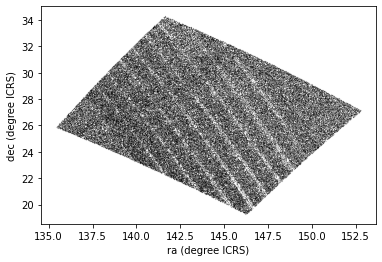

In [85]:
ra = results['ra']
dec = results['dec']
#plt.figure(figsize=[10,10])
plt.plot(ra, dec, 'ko', markersize=0.1, alpha=0.5)

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

#### overplotted

Exercise: modify the plt.plot command to:
* make the markers smaller (start with markersize=0.1)
* make the points semi-transparent (start with alpha=0.1)

Play around with these values until you feel like you have a good visualization of the data

In [17]:
from pyia import GaiaData

In [18]:
gaia_data = GaiaData(results)
type(gaia_data)

pyia.data.GaiaData

In [19]:
import astropy.units as u

In [20]:
sky_coord = gaia_data.get_skycoord(distance = 8*u.kpc,
                                  radial_velocity=0*u.km/u.s)

* parallax error is large at GD-1 distance - so we assume all stars at know GD-1 distance
* radial velocity is not part of our proper motion correction - set to arbitrary value

In [22]:
type(sky_coord)

astropy.coordinates.sky_coordinate.SkyCoord

In [23]:
sky_coord

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(142.48301936, 21.75771617, 8.), (142.25452941, 22.47616817, 8.),
     (142.64528557, 22.16693225, 8.), ..., (143.41554585, 21.19860268, 8.),
     (143.69087392, 21.11356247, 8.), (143.77026813, 21.38317628, 8.)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [( -2.51683847,   2.9418131 , 0.), (  2.66270201, -12.1659844 , 0.),
     ( 18.30674739,  -7.95065962, 0.), ...,
     (-18.80278676,  -0.63556945, 0.), ( -6.82888101, -12.53223687, 0.),
     ( -5.90072495,   1.97640029, 0.)]>

### Transform to GD-1 frame

In [26]:
import gala.coordinates as gc

In [27]:
transformed = sky_coord.transform_to(gc.GD1Koposov10)

In [28]:
type(transformed)

astropy.coordinates.sky_coordinate.SkyCoord

#### reflex correction for Sun's motion around galactic center

In [29]:
gd1_coord = gc.reflex_correct(transformed)
type(gd1_coord)

astropy.coordinates.sky_coordinate.SkyCoord

In [30]:
gd1_coord

<SkyCoord (GD1Koposov10): (phi1, phi2, distance) in (deg, deg, kpc)
    [(-54.97562251, -3.65934904, 8.), (-54.49824711, -3.08152389, 8.),
     (-54.55163387, -3.55422922, 8.), ..., (-54.94894646, -4.69129505, 8.),
     (-54.87334917, -4.95108083, 8.), (-54.6083886 , -4.85901399, 8.)]
 (pm_phi1_cosphi2, pm_phi2, radial_velocity) in (mas / yr, mas / yr, km / s)
    [( 6.42994451,   6.51815743, -85.89847175),
     (-3.16863659,  -6.20679458, -83.12100702),
     ( 9.1294466 , -16.81956952, -84.18853236), ...,
     (-5.75262125,  17.89093031, -87.6914386 ),
     (-8.78623147,   1.25154922, -87.89277153),
     ( 3.69437506,   8.71911075, -86.78009662)]>

gd1_coord has attributes:
* phi1
* phi2
* pm_phi1_cosphi2
* pm_phi2

In [32]:
phi1 = gd1_coord.phi1
phi2 = gd1_coord.phi2

Text(0, 0.5, 'dec (deg GD1)')

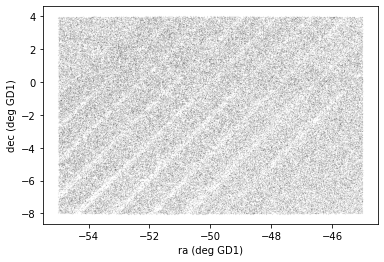

In [34]:
plt.plot(phi1, phi2, 'ko', markersize=0.1, alpha=0.2)
plt.xlabel('ra (deg GD1)')
plt.ylabel('dec (deg GD1)')

We're back to the rectangle in GD-1 space that we defined at the beginning of this lesson

# Pandas DataFrame

We have a lot of different object types floating around

In [35]:
type(results)

astropy.table.table.Table

In [36]:
type(gaia_data)

pyia.data.GaiaData

In [37]:
type(gd1_coord)

astropy.coordinates.sky_coordinate.SkyCoord

Let's choose one for our data

Use Pandas DataFrame
* superset of most other data types
* Broad use inside and out of astronomy
* DOWNSIDE: no metadata

In [39]:
import pandas as pd

In [40]:
df = results.to_pandas()
df.shape

(140340, 8)

In [44]:
df.head()

,source_id,ra,dec,pmra,pmdec,parallax,parallax_error,radial_velocity
0,637987125186749568,142.483019,21.757716,-2.516838,2.941813,-0.257345,0.823721,1.000000e+20
1,638285195917112960,142.254529,22.476168,2.662702,-12.165984,0.422728,0.297472,1.000000e+20
2,638073505568978688,142.645286,22.166932,18.306747,-7.950660,0.103640,0.544584,1.000000e+20
3,638086386175786752,142.577394,22.227920,0.987786,-2.584105,-0.857327,1.059607,1.000000e+20
4,638049655615392384,142.589136,22.110783,0.244439,-4.941079,0.099625,0.486224,1.000000e+20


Note: shape is a method but head is a function

In [45]:
df['phi1'] = gd1_coord.phi1
df['phi2'] = gd1_coord.phi2
df['pm_phi1'] = gd1_coord.pm_phi1_cosphi2
df['pm_phi2'] = gd1_coord.pm_phi2

In [46]:
df.shape

(140340, 12)

added columns on the fly

In [47]:
df.head()

,source_id,ra,dec,pmra,pmdec,parallax,parallax_error,radial_velocity,phi1,phi2,pm_phi1,pm_phi2
0,637987125186749568,142.483019,21.757716,-2.516838,2.941813,-0.257345,0.823721,1.000000e+20,-54.975623,-3.659349,6.429945,6.518157
1,638285195917112960,142.254529,22.476168,2.662702,-12.165984,0.422728,0.297472,1.000000e+20,-54.498247,-3.081524,-3.168637,-6.206795
2,638073505568978688,142.645286,22.166932,18.306747,-7.950660,0.103640,0.544584,1.000000e+20,-54.551634,-3.554229,9.129447,-16.819570
3,638086386175786752,142.577394,22.227920,0.987786,-2.584105,-0.857327,1.059607,1.000000e+20,-54.536457,-3.467966,3.837120,0.526461
4,638049655615392384,142.589136,22.110783,0.244439,-4.941079,0.099625,0.486224,1.000000e+20,-54.627448,-3.542738,1.466103,-0.185292


# Plot Proper Motion

Plot PM of stars near center line of GD-1 (phi2= +/- 1 deg from 0)

In [49]:
#redefine phi2
phi2 = df['phi2']
type(phi2)

pandas.core.series.Series

Series is a Pandas Column object

In [50]:
phi2_min = -1.0*u.deg
phi2_max = 1.0*u.deg


use to mask out rows in the DataFrame

In [56]:
phi_mask = ((df['phi2']>phi2_min) & 
            (df['phi2']<phi2_max))

In [51]:
type(phi_mask)

pandas.core.series.Series

In [52]:
phi_mask.dtype

dtype('bool')

In [53]:
phi_mask.head()

0    False
1    False
2    False
3    False
4    False
Name: phi2, dtype: bool

In [55]:
selected = df[phi_mask]
type(selected)

pandas.core.frame.DataFrame

logical and - where both are True
a way to check how many objects - Trues count as 1 and Falses count as 0

In [57]:
phi_mask.sum()

25084

In [58]:
centerline = df[phi_mask]
len(centerline)

25084

Text(0, 0.5, 'Proper Motion Phi2 (GD1 frame)')

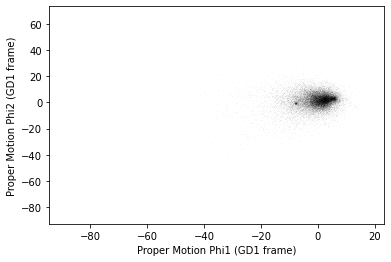

In [60]:
pm1 = centerline['pm_phi1']
pm2 = centerline['pm_phi2']

plt.plot(pm1, pm2, 'ko', markersize=0.1, alpha=0.1)
plt.xlabel('Proper Motion Phi1 (GD1 frame)')
plt.ylabel('Proper Motion Phi2 (GD1 frame)')

### Set axis limits to match plot

(-10.0, 10.0)

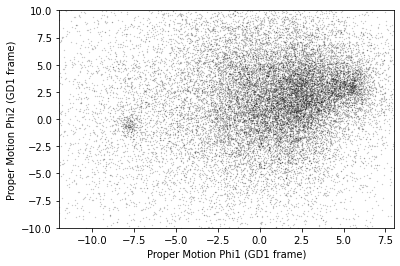

In [66]:
pm1 = centerline['pm_phi1']
pm2 = centerline['pm_phi2']

plt.plot(pm1, pm2, 'ko', markersize=0.3, alpha=0.3)
plt.xlabel('Proper Motion Phi1 (GD1 frame)')
plt.ylabel('Proper Motion Phi2 (GD1 frame)')
plt.xlim(-12, 8)
plt.ylim(-10, 10)

This is less dense than the original paper because our region is smaller

# Select GD-1 stars based on PM

Do this first locally with DF - in next lesson we'll do it remotely with ADQL

Use a rectangle

In [63]:
pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max = 1.0

Draw on figure - make a list of vertices in a circle

In [65]:
pm1_rect = [pm1_min , pm1_min, pm1_max, pm1_max, pm1_min]*u.mas/u.yr
pm2_rect = [pm2_min, pm2_max, pm2_max, pm2_min, pm2_min]*u.mas/u.yr

(-10.0, 10.0)

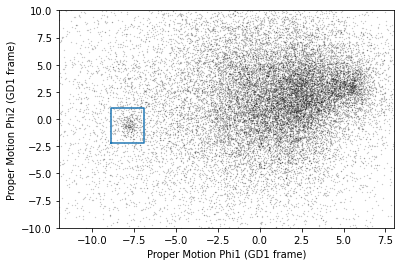

In [67]:
pm1 = centerline['pm_phi1']
pm2 = centerline['pm_phi2']

plt.plot(pm1, pm2, 'ko', markersize=0.3, alpha=0.3)
plt.plot(pm1_rect, pm2_rect, '-')

plt.xlabel('Proper Motion Phi1 (GD1 frame)')
plt.ylabel('Proper Motion Phi2 (GD1 frame)')
plt.xlim(-12, 8)
plt.ylim(-10, 10)


Because we're going to be selecting things between other things a lot from this DF, we're going to make a function that takes a series and a low and high value and returns the mask of the values in between

In [68]:
def between(series, low, high):
    """Make a Boolean Series
    
    series: Pandas Series
    low: lower bound
    high: upper bound
    
    returns: Boolean Series
    """
    return (series>low) & (series<high)

In [69]:
pm_mask = (between(df['pm_phi1'], pm1_min, pm1_max) &
           between(df['pm_phi2'], pm2_min, pm2_max))

Notice we've gone back to the full DF

In [71]:
pm_mask.sum()

1049

In [72]:
selected = df[pm_mask]
len(selected)

1049

### Plot the location of these GD-1 candidates

Text(0, 0.5, 'dec (degree GD1)')

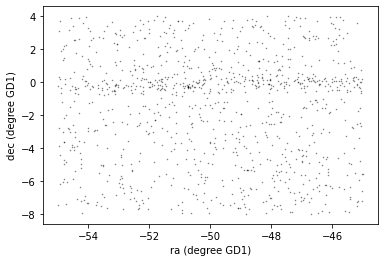

In [73]:
phi1 = selected['phi1']
phi2 = selected['phi2']
plt.plot(phi1, phi2, 'ko', markersize=0.5, alpha=0.5)

plt.xlabel('ra (degree GD1)')
plt.ylabel('dec (degree GD1)')

# Saving the DataFrame

We've run the query and cleaned the results (made a figure) - we should save the data

### Convert back to Astropy Table

In [74]:
selected_table = Table.from_pandas(selected)
type(selected_table)

astropy.table.table.Table

### Write directly from DataFrame

We're going to look at a modern alternative to FITS - HDF5
* still had header (metadata) + binary data (column names, row labels, data types)
* can contain more than one table (like a multi-extension fits file) - these are called Datasets
* cross-language standard (not just Pandas or Python)

if needed:

In [76]:
!rm -f gd1_dataframe.hdf5

In [78]:
filename = 'gd1_dataframe.hdf5'
df.to_hdf(filename, 'df') #filename and key that identifies this Dataset

Exercise: Write centerline and selected to the same file as Datasets so that we can use them later

In [79]:
centerline.to_hdf(filename, 'centerline')
selected.to_hdf(filename, 'selected')

In [80]:
!ls -lh gd1_dataframe.hdf5

-rw-r--r--  1 bostroem  staff    17M Nov 16 20:29 gd1_dataframe.hdf5


### Reading hdf5 files

In [81]:
read_back_df = pd.read_hdf(filename, 'df')
read_back_df.shape

(140340, 12)